In [1]:
import arcpy,pandas,json
from sklearn.cluster import KMeans

In [2]:
import seaborn as sns
sns.set(font_scale=1.4)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
def getColorDist(colName, colValue):
    cm = plt.cm.get_cmap(colName)
    colNum = len(colValue)
    col = [cm(float(i)/(colNum)) for i in range(colNum)]
    cols = {}
    for i in range(len(col)):
        c = col[i]
        f = "#"
        for c1 in c:
            cc = "{0}".format(hex(int(c1*255)))[2:]
            if len(cc) < 2:
                cc = "0"+cc
            f+=cc
        cols[colValue[i]] = f
    return cols

In [4]:
feat = "./data2_SD/shandongProject.shp"

In [5]:
sd = pandas.DataFrame(arcpy.da.FeatureClassToNumPyArray(feat,["FIRST_NAME","F",
                                             "O","R","S","T"]))

In [6]:
sd.columns=["name","财政收入","工业生产总值","消费品零售额","总出口","固定资产投资"]

In [7]:
dataSet = [(x) for x in zip(sd["财政收入"],sd["工业生产总值"],
                            sd["消费品零售额"],sd["总出口"],sd["固定资产投资"])]

In [8]:
ncluster = 5
clf = KMeans(n_clusters=ncluster)
s = clf.fit(dataSet)
numSamples=len(dataSet)
sd["clf"] = clf.labels_
col = getColorDist("hsv",range(ncluster))

In [9]:
sd.head()

,name,财政收入,工业生产总值,消费品零售额,总出口,固定资产投资,clf
0,历下区,1305958,3015547,8293492,66718,2177776,1
1,市中区,922817,3044560,4399444,33338,1932930,1
2,槐荫区,450489,1663764,4340591,31706,2561427,1
3,天桥区,390544,547803,3698543,35692,1963504,1
4,历城区,701012,5680678,4761638,111934,5102456,1


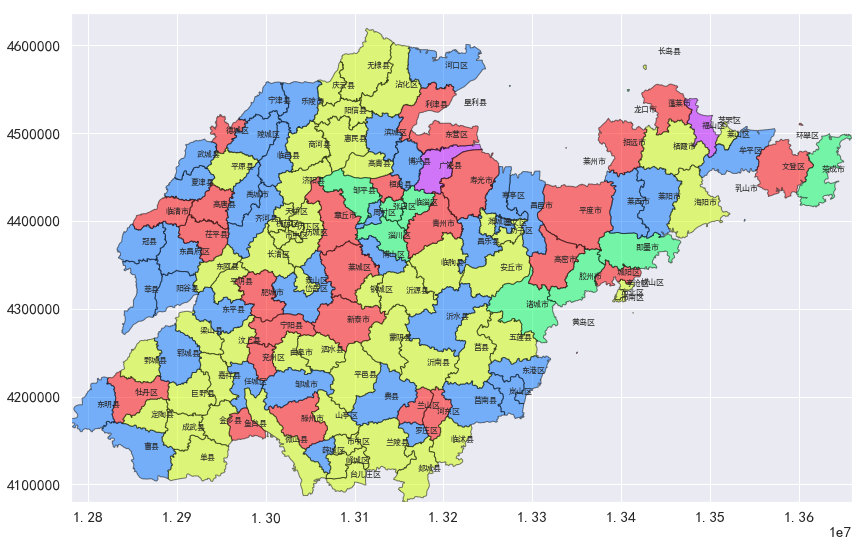

In [10]:
ext = arcpy.Describe(feat).extent
fig = plt.figure(figsize=(14,9)) 
ax = fig.gca() 
ax.grid(alpha= 1)
basemap = arcpy.FeatureSet(feat)
for g in arcpy.da.SearchCursor(basemap,["SHAPE@JSON","FIRST_NAME",
                                       "SHAPE@XY"]):
    clf = sd[sd["name"] == g[1]]["clf"].tolist()[0]
    c = col[clf]
    poly = plt.Polygon(json.loads(g[0])["rings"][0],
                       ec = '#000000',fc=c, alpha = 0.5)
    plt.text(g[2][0], g[2][1],g[1],fontsize=8)
    ax.add_patch(poly)
ax.set_xlim(ext.XMin,ext.XMax)
ax.set_ylim(ext.YMin,ext.YMax)
plt.show()

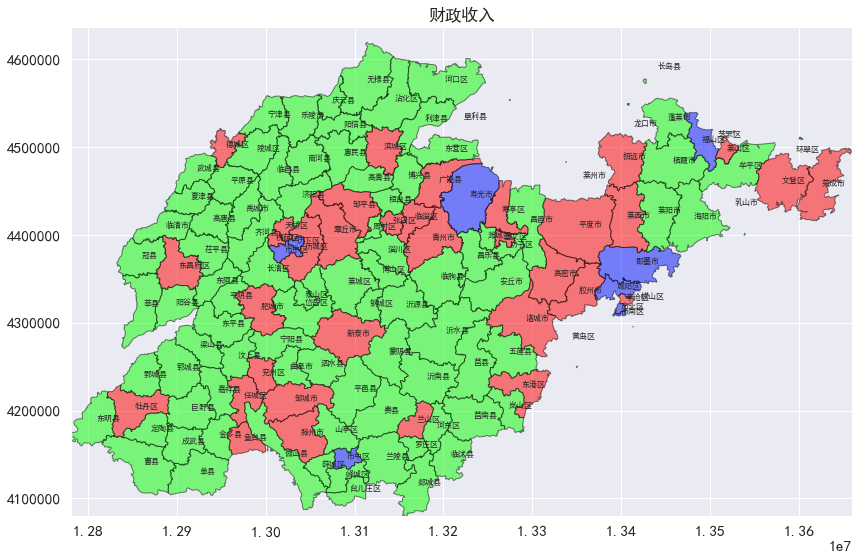

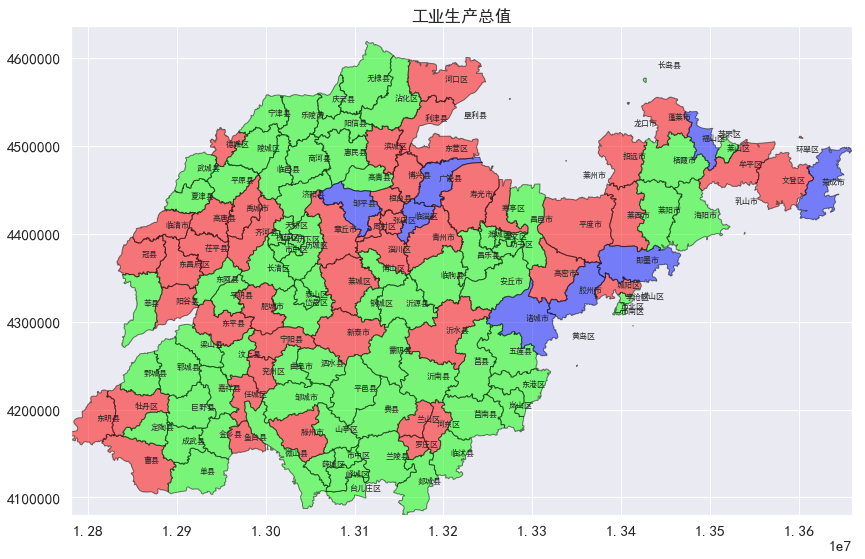

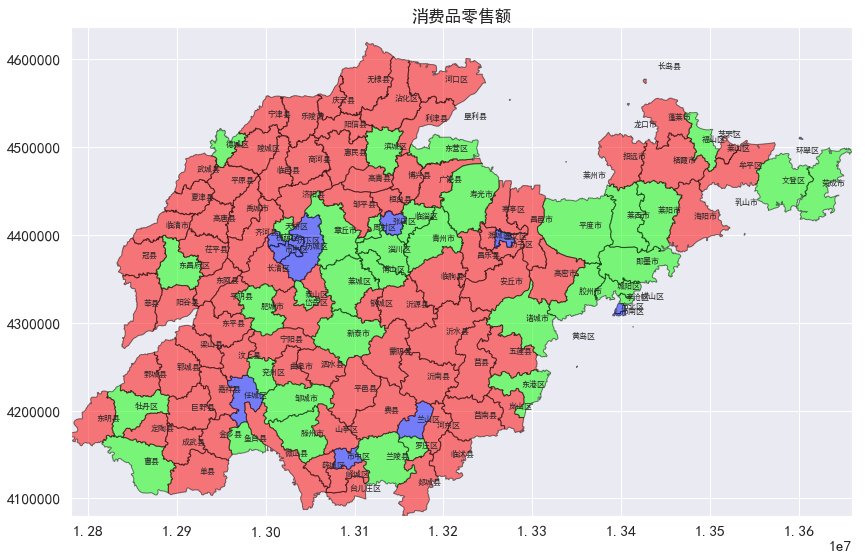

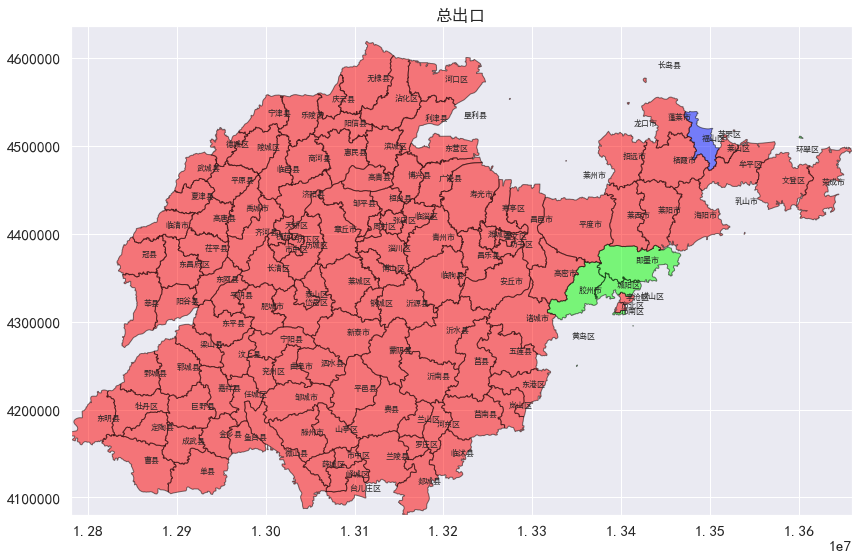

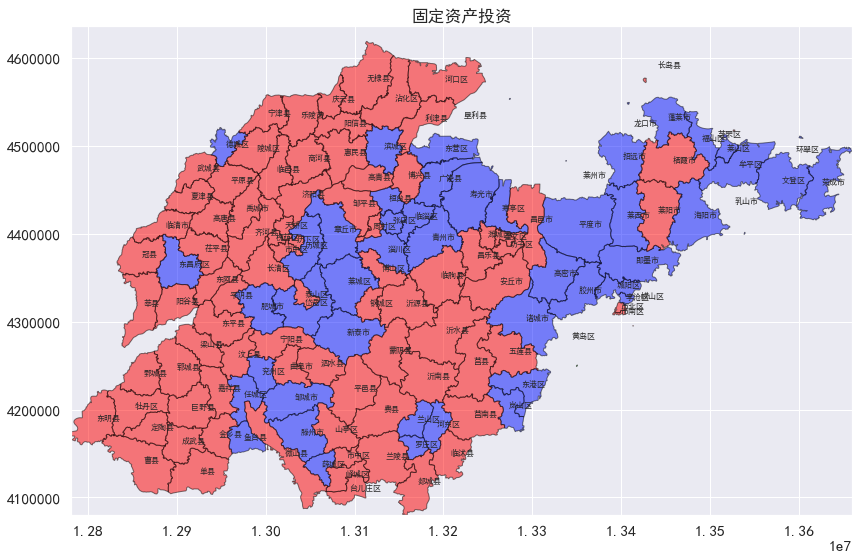

In [14]:
for column in ["财政收入","工业生产总值","消费品零售额","总出口","固定资产投资"]:
    dataSet = [(x) for x in zip(sd[column])]
    ncluster = 3
    clf = KMeans(n_clusters=ncluster)
    s = clf.fit(dataSet)
    numSamples=len(dataSet)
    sd["clf"] = clf.labels_
    col = getColorDist("hsv",range(ncluster))
    ext = arcpy.Describe(feat).extent
    fig = plt.figure(figsize=(14,9)) 
    ax = fig.gca() 
    ax.grid(alpha= 1)
    basemap = arcpy.FeatureSet(feat)
    for g in arcpy.da.SearchCursor(basemap,["SHAPE@JSON","FIRST_NAME",
                                           "SHAPE@XY"]):
        clf = sd[sd["name"] == g[1]]["clf"].tolist()[0]
        c = col[clf]
        poly = plt.Polygon(json.loads(g[0])["rings"][0],
                           ec = '#000000',fc=c, alpha = 0.5)
        plt.text(g[2][0], g[2][1],g[1],fontsize=8)
        ax.add_patch(poly)
    ax.set_xlim(ext.XMin,ext.XMax)
    ax.set_ylim(ext.YMin,ext.YMax)
    plt.title(column)
    plt.show()

In [12]:
dataSet = [(x) for x in zip(sd["总出口"])]
ncluster = 3
clf = KMeans(n_clusters=ncluster)
s = clf.fit(dataSet)
numSamples=len(dataSet)
sd["clf"] = clf.labels_
sd.sort_values("总出口",ascending=False)

,name,财政收入,工业生产总值,消费品零售额,总出口,固定资产投资,clf
40,福山区,1092669,41545818,2266842,1539855,8814555,2
80,环翠区,976102,15442497,4607547,837640,7460957,0
15,城阳区,993478,19408492,2240042,824013,7481470,0
12,黄岛区,1877453,52197347,4590240,801746,17101586,0
10,市南区,1113719,1375500,4916896,607308,1253379,0
13,崂山区,1190145,6062372,1959831,495612,2197364,0
16,胶州市,800616,26281633,3289637,453096,8980124,0
17,即墨市,930493,31121334,3870665,408000,9479045,0
38,广饶县,424045,42950002,1731671,293160,7704296,1
19,莱西市,475080,11576800,2662102,241372,6019000,1


In [13]:
dataSet = [(x) for x in zip(sd["固定资产投资"])]
ncluster = 3
clf = KMeans(n_clusters=ncluster)
s = clf.fit(dataSet)
numSamples=len(dataSet)
sd["clf"] = clf.labels_
sd.sort_values("固定资产投资",ascending=False)

,name,财政收入,工业生产总值,消费品零售额,总出口,固定资产投资,clf
12,黄岛区,1877453,52197347,4590240,801746,17101586,2
17,即墨市,930493,31121334,3870665,408000,9479045,1
16,胶州市,800616,26281633,3289637,453096,8980124,1
40,福山区,1092669,41545818,2266842,1539855,8814555,1
38,广饶县,424045,42950002,1731671,293160,7704296,1
15,城阳区,993478,19408492,2240042,824013,7481470,1
80,环翠区,976102,15442497,4607547,837640,7460957,1
82,荣成市,672789,29218016,3265187,229470,7336383,1
18,平度市,580239,17261484,3501652,161000,6778909,1
90,兰山区,707177,19336813,5198974,156779,6451575,1
